# Introduction
<p>Welcome! In this notebook i'm going to analyze credit card's customers data and implement a Machine Learning Classfier to predict the attrition probabilty of customers</p>
<h3>My main objectives on this project are:</h3>   
<ul>
    <li>Applying exploratory data analysis and trying to get some insights about our dataset</li>
    <li>Getting data in better shape by transforming and feature engineering to help us in building better models</li>
    <li>Building and tuning different ML algorithms to get some results on predicting Attrition</li>
</ul>

<h2>Importing Libraries</h2>
<p>Lets start by importing some packages we are going to need</p>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Meeting the data
<p>Lets open the data and see what we have</p>

In [2]:
#Opening the data
data = pd.read_csv('./customersData.csv')

In [3]:
#Lets see the shapes of the data so we know what we are dealing with
data.shape

(10127, 23)

In [4]:
#lets observe some of his elements
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [5]:
#Lets delete the last two columns as they are irrelevant
data.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                  "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
                  'CLIENTNUM'], inplace=True)


# EDA
<p>Exploratory Data Analysis</p>

<p>Lets create a heatmap graphic here. With this graphic we can see the correlation between different features</p>

In [6]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [7]:
# Lets encode the target
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})

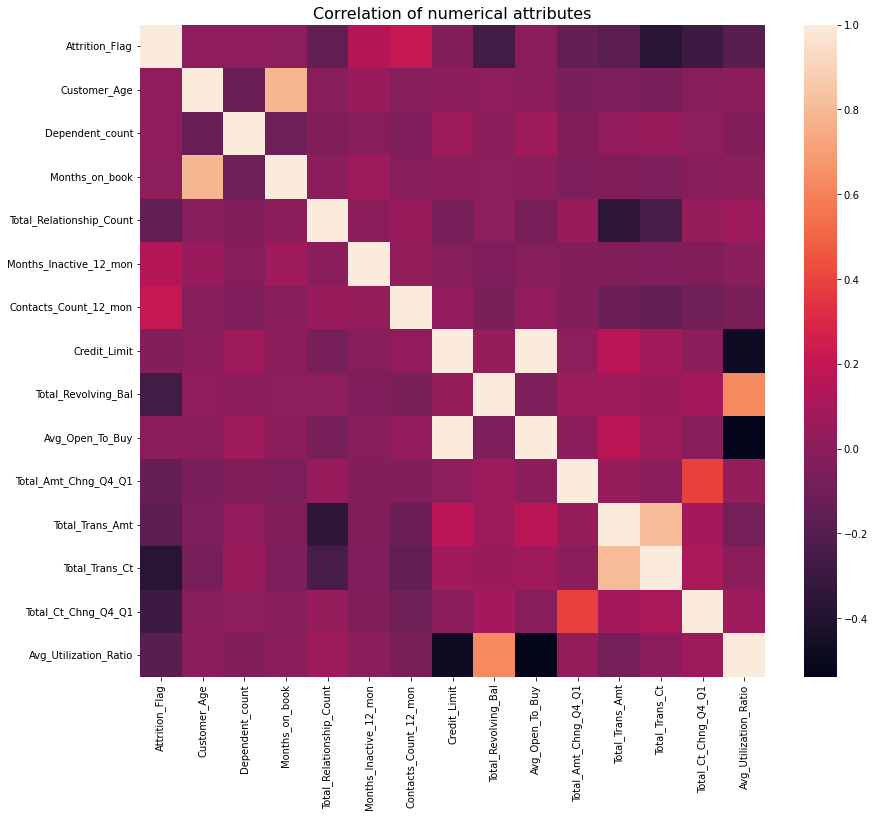

In [8]:
correlation = data.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

<h4>Observations</h4>
<li>Let's focus on the lighter parts of the graph</li>
<ol>
    <li>Customer age and Months on book have a high correlation because these customers just got the possibility of getting a credit card</li>
    <li>Avg_Open_To_Buy and Credit_Limit have a high correlation because they are telling the "same thing"</li>
    <li>Total Transaction Amount is high correlated with Total Transacion Count because usually the amount tends to get higher as the count of transactions grow</li>
</ol>

In [9]:
# Let's create an Customer_Age_Group column using bins
data['Customer_Age_Group'] = pd.cut(data['Customer_Age'],bins=[18,25,35,45,55,65,100],labels=['18-25','25-35','35-45','45-55','55-65','65+'])

<AxesSubplot:xlabel='Customer_Age_Group', ylabel='count'>

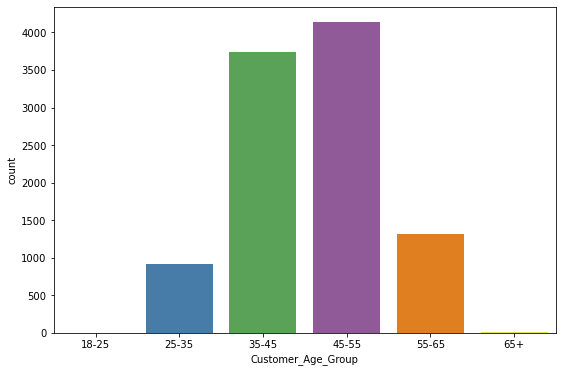

In [10]:
# Let's make a plot to see the distribution of Customer_Age_Group
plt.figure(figsize=(9,6))
# Generate a histogram
sns.countplot(x='Customer_Age_Group',data=data,palette='Set1')

In [11]:
# Let's map Customer_Age_Group as an ordinal variable
data['Customer_Age_Group'] = data['Customer_Age_Group'].map({'18-25':1,'25-35':2,'35-45':3,'45-55':4,'55-65':5,'65+':6})

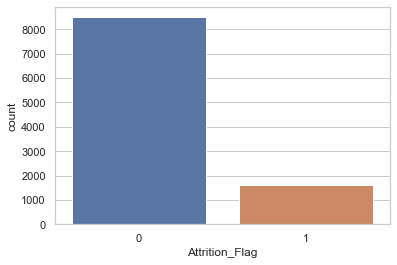

In [12]:
# Plot histogram of the target
sns.set(style="whitegrid")
sns.countplot(x="Attrition_Flag", data=data)
plt.show()

In [13]:
data['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [14]:
unkown_inc = data[data['Income_Category'] == 'Unknown'].shape[0]
amt_rows = data.shape[0]
percentage = round((unkown_inc/amt_rows)*100, 2)
print("The number of unknown incomes is: ", unkown_inc)
print("The total number of rows is: ", amt_rows)
print("The percentage of unknown incomes overall is: %", percentage)

The number of unknown incomes is:  1112
The total number of rows is:  10127
The percentage of unknown incomes overall is: % 10.98


In [15]:
# Let's replace the unknown incomes with the mode of the Income_Category
data['Income_Category'].replace('Unknown', data['Income_Category'].mode()[0], inplace=True)

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

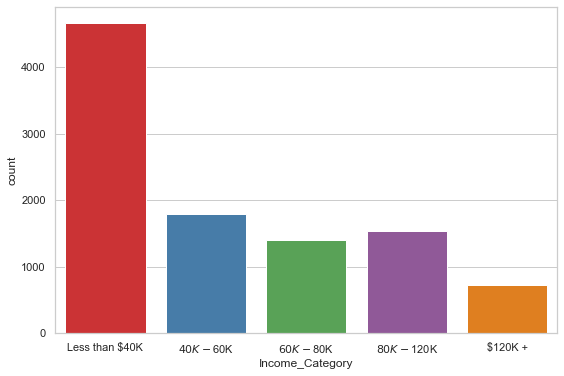

In [16]:
# Let's make a plot to see the distribution of Income_Category
# Size of the plot: (12,8)
plt.figure(figsize=(9,6))
# Generate a histogram
sns.countplot(x='Income_Category',data=data,palette='Set1', order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'])

In [17]:
# Map Income_Category as an ordinal variable
data['Income_Category'] = data['Income_Category'].map({'Less than $40K': 1, '$40K - $60K': 2,
                                                 '$60K - $80K': 3, '$80K - $120K': 4,
                                                 '$120K +': 5})

In [18]:
# Let's replace the unknown Education_Level with the mode of the Education_Level
data['Education_Level'].replace('Unknown', data['Education_Level'].mode()[0], inplace=True)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

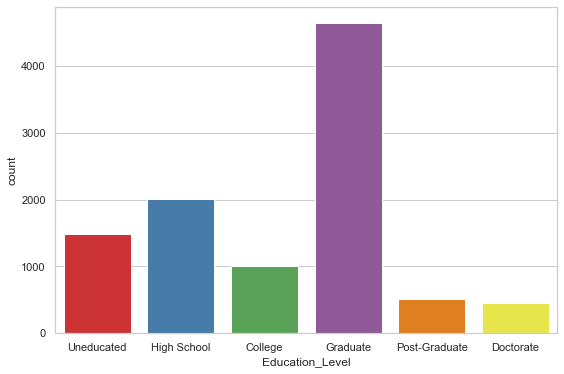

In [19]:
# Let's make a plot to see the distribution of Education_Level
# Size of the plot: (12,8)
plt.figure(figsize=(9,6))
# Generate a histogram
sns.countplot(x='Education_Level',data=data,palette='Set1', order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'])

In [20]:
data['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [21]:
# Map Education_Level as an ordinal variable
data['Education_Level'] = data['Education_Level'].map({'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6})

In [22]:
data['Credit_Limit'].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

C:\Users\juanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


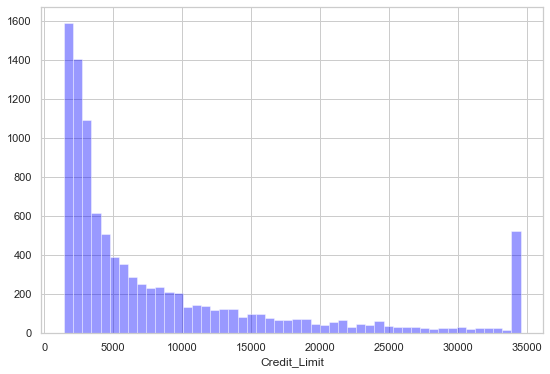

In [23]:
# Lets plot the distribution of Credit_Limit
plt.figure(figsize=(9,6))
sns.distplot(data['Credit_Limit'], bins=50, kde=False, color='blue')
plt.show()

In [24]:
# Let's bin the Credit_Limit
data['Credit_Limit_Group'] = pd.cut(data['Credit_Limit'],bins=[0,10000,20000,34000,1000000],labels=['0-10000', '10000-20000', '20000-34000', '34000+'])

<AxesSubplot:xlabel='Credit_Limit_Group', ylabel='count'>

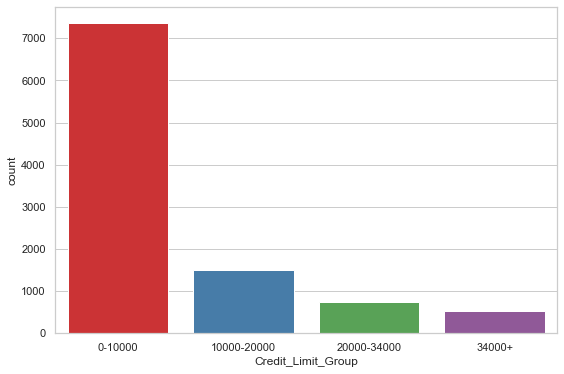

In [25]:
# Plot the distribution of Credit_Limit_Group
plt.figure(figsize=(9,6))
sns.countplot(x='Credit_Limit_Group',data=data,palette='Set1', order=['0-10000', '10000-20000', '20000-34000', '34000+'])

<AxesSubplot:xlabel='Credit_Limit_Group', ylabel='count'>

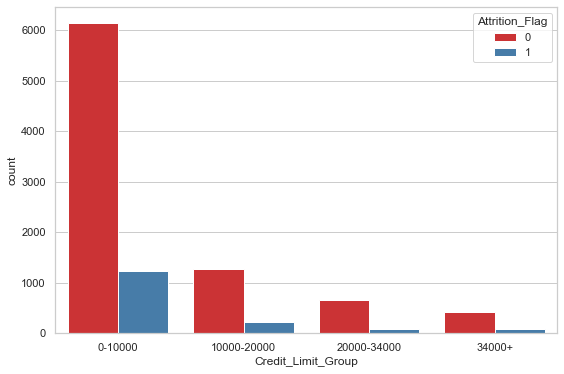

In [26]:
# Lets plot the distribution of Credit_Limit_Group in relation to the target
plt.figure(figsize=(9,6))
sns.countplot(x='Credit_Limit_Group', hue='Attrition_Flag', data=data, palette='Set1', order=['0-10000', '10000-20000', '20000-34000', '34000+'])

In [27]:
# Let's map the Credit_Limit as an ordinal variable
data['Credit_Limit_Group'] = data['Credit_Limit_Group'].map({'0-10000': 1, '10000-20000': 2, '20000-34000': 3, '34000+': 4})

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

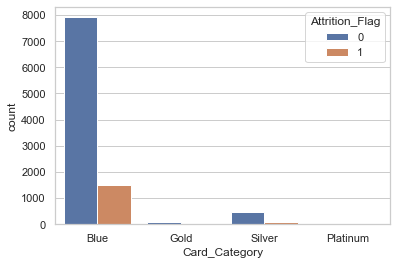

In [28]:
# Lets plot the distribution of card category in relation to the target
sns.set(style="whitegrid")
sns.countplot(x="Card_Category", hue="Attrition_Flag", data=data)

In [29]:
# Let's map Card_Category as an ordinal variable
data['Card_Category'] = data['Card_Category'].map({'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4})

In [30]:
# Drop 'Avg_Open_To_Buy' since it is similar to Credit_Limit
data.drop(columns=['Avg_Open_To_Buy'], inplace=True)

In [31]:
data['Total_Trans_Amt'].describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

C:\Users\juanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


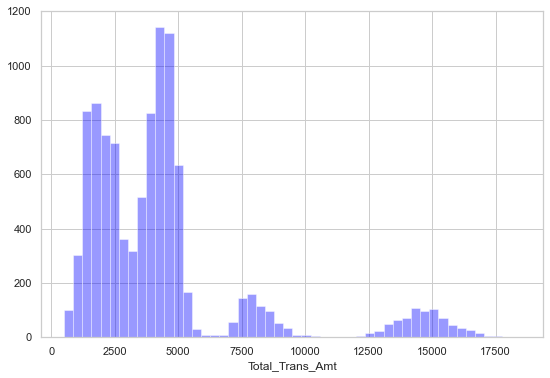

In [32]:
# Let's plot the distribution of Total_Trans_Amt
plt.figure(figsize=(9,6))
sns.distplot(data['Total_Trans_Amt'], bins=50, kde=False, color='blue')
plt.show()

In [33]:
# Let's bin Total_Trans_Amt
data['Total_Trans_Amt_Group'] = pd.cut(data['Total_Trans_Amt'],bins=[0,6000,12000,1000000],labels=['0-6000', '6000-12000', '12000+'])

<AxesSubplot:xlabel='Total_Trans_Amt_Group', ylabel='count'>

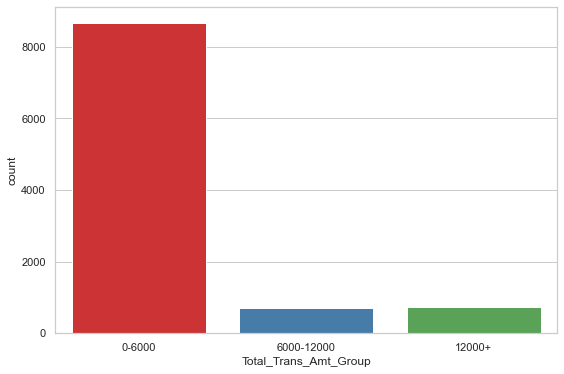

In [34]:
# Plot the distribution of Total_Trans_Amt_Group
plt.figure(figsize=(9,6))
sns.countplot(x='Total_Trans_Amt_Group',data=data,palette='Set1', order=['0-6000', '6000-12000', '12000+'])

<AxesSubplot:xlabel='Total_Trans_Amt_Group', ylabel='count'>

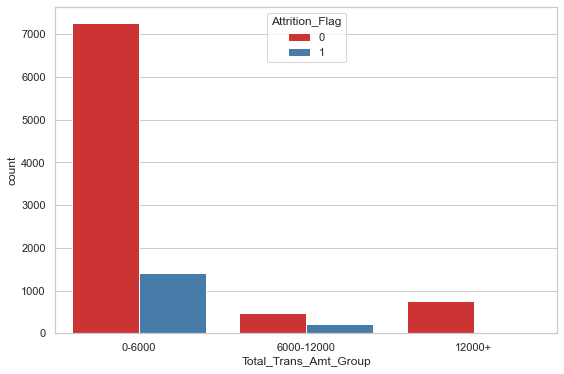

In [35]:
# Lets plot the distribution of Total_Trans_Amt_Group in relation to the target
plt.figure(figsize=(9,6))
sns.countplot(x='Total_Trans_Amt_Group', hue='Attrition_Flag', data=data, palette='Set1', order=['0-6000', '6000-12000', '12000+'])

<li>We can see that the amount of Attrited Customers when the amount of transactions is 12000+, is close to 0</li>

In [36]:
# Let's map Total_Trans_Amt as an ordinal variable
data['Total_Trans_Amt_Group'] = data['Total_Trans_Amt_Group'].map({'0-6000': 1, '6000-12000': 2, '12000+': 3})

In [37]:
data['Total_Trans_Ct'].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

C:\Users\juanm\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


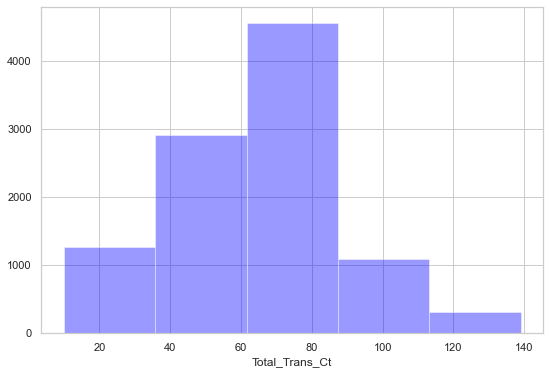

In [38]:
# Let's plot the distribution of Total_Trans_Ct 
plt.figure(figsize=(9,6))
sns.distplot(data['Total_Trans_Ct'], bins=5, kde=False, color='blue')
plt.show()

In [39]:
#Lets see the variability and some other statistics of categorical columns
cat_columns = data.select_dtypes(include=['object']).columns
for col in cat_columns:
    print(data[col].value_counts(ascending=True, normalize=True))
    print(data[col].describe())
    print("---------------------------------------------------")

M    0.470919
F    0.529081
Name: Gender, dtype: float64
count     10127
unique        2
top           F
freq       5358
Name: Gender, dtype: object
---------------------------------------------------
Divorced    0.073862
Unknown     0.073961
Single      0.389355
Married     0.462822
Name: Marital_Status, dtype: float64
count       10127
unique          4
top       Married
freq         4687
Name: Marital_Status, dtype: object
---------------------------------------------------


# Missing Data
<ul>
    <li>Lets see if there any missing values and visualize them</li>
</ul>

In [40]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Customer_Age_Group          0
Credit_Limit_Group          0
Total_Trans_Amt_Group       0
dtype: int64

<li>Luckily we don't have any missing values, so we can proceed with modeling</li>

# Preprocessing + Pipeline
<li>First, lets split the data into train and test dataframes</li>
<p>Pipeline Steps:</p>
<ol>
    <li>Specific Columns encoding</li>
    <li>One Hot Encoding</li>
    <li>Quantile Proccesing</li>
    <li>Fit the model</li>
</ol>

In [41]:
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})

In [42]:
data['Gender'].unique()

array([1, 0], dtype=int64)

In [43]:
X = data.drop(columns=['Attrition_Flag'])

In [44]:
y = data['Attrition_Flag']

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer

catTransformer = ColumnTransformer(
                [('encoder', OneHotEncoder(), cat_columns)]
                , remainder='passthrough')

In [46]:
X = catTransformer.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

In [48]:
# Import SMOTE
from imblearn.over_sampling import SMOTE
# Over-sample the training data
os = SMOTE(random_state=42)
X_train, y_train = os.fit_resample(X_train, y_train)

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.07, max_depth=7, min_child_weight=4,
                  n_estimators = 500, nthread=4, objective= 'reg:linear', subsample= 0.7, tree_method='gpu_hist')

In [50]:
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline(steps=[
                                #('One Hot Encoding', catTransformer),
                                #('Quantile_Proccesing', QuantileTransformer(n_quantiles=10, random_state=0)),
                                ('XGBoost', xgb)
                                ])
model_pipeline.fit(X_train, y_train)

C:\Users\juanm\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, enable_categorical=False,
                               gamma=0, gpu_id=0, importance_type=None,
                               interaction_constraints='', learning_rate=0.07,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=4, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=4, nthread=4, num_parallel_tree=1,
                               objective='reg:linear', predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.7,
                               tree_method='gpu_hist', validate_parameters=1,
                               verbosit

In [51]:
# Accuracy Metrics
from sklearn.metrics import accuracy_score

y_pred = model_pipeline.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.89%


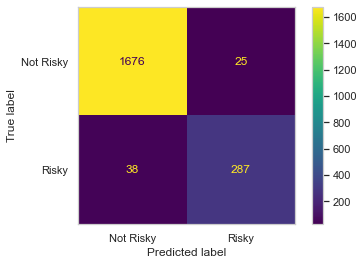

------------------------------------------

		Testing data results report

               precision    recall  f1-score   support

   Not Risky       0.98      0.99      0.98      1701
       Risky       0.92      0.88      0.90       325

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy: What percentage of those that we have said are Risky, actually are?

Recall: It gives us the amount of found cases: What percentage of the Risky users were we able to identify?

F1: Combines Accuracy and Recall into one metric


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
target_names = ['Not Risk of Attrition', 'Risk of Attrition']
y_pred = model_pipeline.predict(X_test)
# Hide grid lines from confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=target_names)
disp.plot()
plt.grid(False)
plt.show()



clf_report = classification_report(y_test, y_pred, target_names=target_names)

print('------------------------------------------')
print('')
print("\t\tTesting data results report\n\n", clf_report)
print("Accuracy: What percentage of those that we have said are Risky, actually are?\n")
print("Recall: It gives us the amount of found cases: What percentage of the Risky users were we able to identify?\n")
print("F1: Combines Accuracy and Recall into one metric")

AUC: 0.9906299461855017


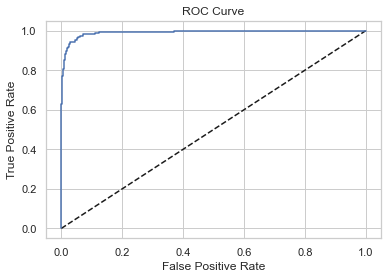

In [53]:
y_pred_prob = model_pipeline.predict_proba(X_test)[:,1]
# Import roc_auc_score
from sklearn.metrics import roc_auc_score
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)
# Import roc_curve
from sklearn.metrics import roc_curve
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# End
<p>Thanks for going all the way down through my notebook! I hope you were able to get something usefull from this. Feel free to ask your questions and use my code</p>